In [2]:
import numpy as np
import pandas as pd
import scipy
import IPython

In [47]:
df_notes = pd.read_csv("../assets/notes.csv")
df_notes = df_notes.set_index('note')
df_notes.sample(5)

freq
note            
D6       1174.66
B4        493.88
D#6/Eb6  1244.51
C4        261.63
B3        246.94

In [48]:
freqs = df_notes["freq"].values
freqs

array([  16.35,   17.32,   18.35,   19.45,   20.6 ,   21.83,   23.12,
         24.5 ,   25.96,   27.5 ,   29.14,   30.87,   32.7 ,   34.65,
         36.71,   38.89,   41.2 ,   43.65,   46.25,   49.  ,   51.91,
         55.  ,   58.27,   61.74,   65.41,   69.3 ,   73.42,   77.78,
         82.41,   87.31,   92.5 ,   98.  ,  103.83,  110.  ,  116.54,
        123.47,  130.81,  138.59,  146.83,  155.56,  164.81,  174.61,
        185.  ,  196.  ,  207.65,  220.  ,  233.08,  246.94,  261.63,
        277.18,  293.66,  311.13,  329.63,  349.23,  369.99,  392.  ,
        415.3 ,  440.  ,  466.16,  493.88,  523.25,  554.37,  587.33,
        622.25,  659.25,  698.46,  739.99,  783.99,  830.61,  880.  ,
        932.33,  987.77, 1046.5 , 1108.73, 1174.66, 1244.51, 1318.51,
       1396.91, 1479.98, 1567.98, 1661.22, 1760.  , 1864.66, 1975.53,
       2093.  , 2217.46, 2349.32, 2489.02, 2637.02, 2793.83, 2959.96,
       3135.96, 3322.44, 3520.  , 3729.31, 3951.07, 4186.01, 4434.92,
       4698.63, 4978

In [49]:
rate, riff1 = scipy.io.wavfile.read("../samples/riff1.wav")
IPython.display.Audio(riff1, rate=rate)

/tmp/ipykernel_20494/2331219023.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, riff1 = scipy.io.wavfile.read("../samples/riff1.wav")


In [50]:
_, riff2 = scipy.io.wavfile.read("../samples/riff2.wav")
IPython.display.Audio(riff2, rate=rate)

/tmp/ipykernel_20494/139782533.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, riff2 = scipy.io.wavfile.read("../samples/riff2.wav")


In [51]:
_, riff3 = scipy.io.wavfile.read("../samples/riff3.wav")
IPython.display.Audio(riff3, rate=rate)

/tmp/ipykernel_20494/1061661038.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, riff3 = scipy.io.wavfile.read("../samples/riff3.wav")


In [52]:
riff1 = riff1/np.linalg.norm(riff1)
riff2 = riff2/np.linalg.norm(riff2)
riff3 = riff3/np.linalg.norm(riff3)

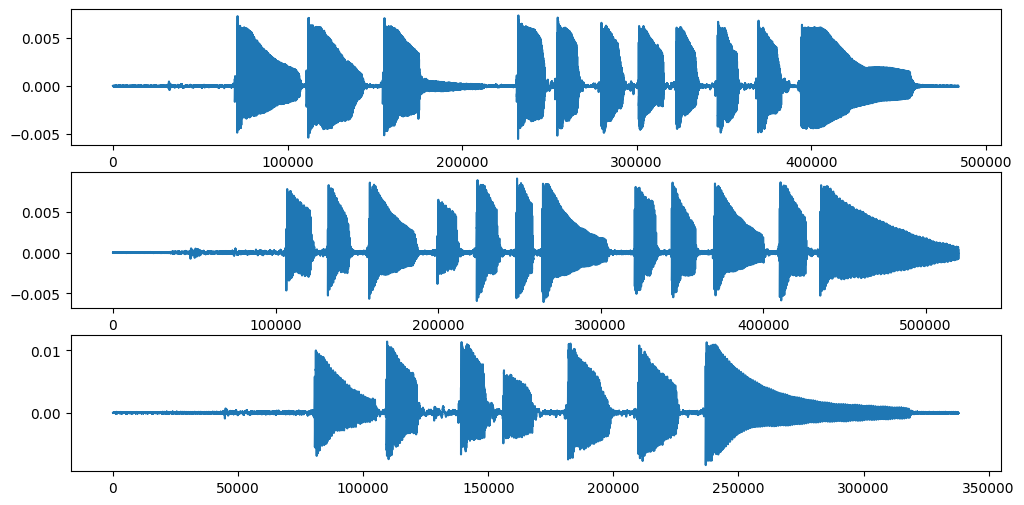

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, figsize=(12,6))

ax[0].plot(riff1)
ax[1].plot(riff2)
ax[2].plot(riff3)

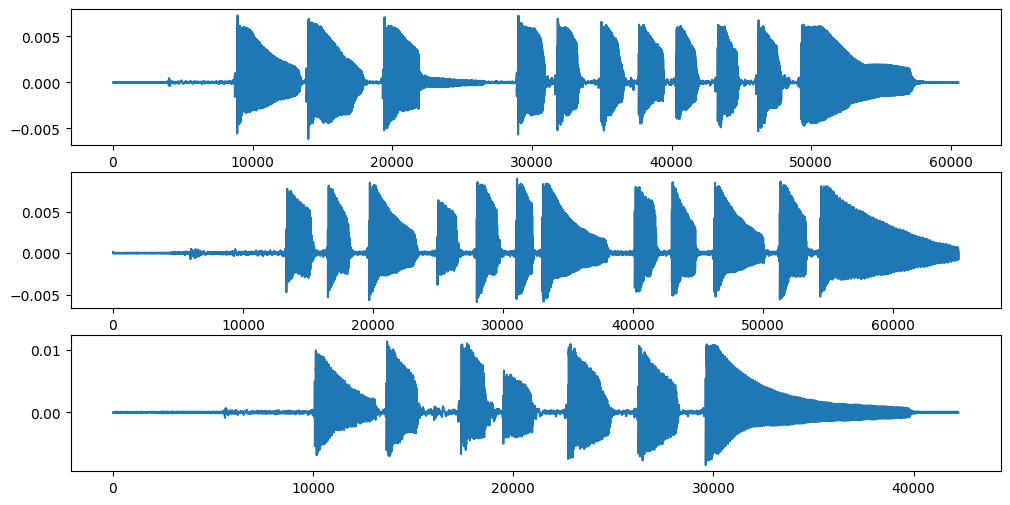

In [54]:
new_rate = 6000

def resample(data, old_rate=rate,new_rate=6000):
    return scipy.signal.resample(data, len(data) * new_rate // old_rate)

riff1_resampled = resample(riff1,old_rate=rate,new_rate=new_rate)
riff2_resampled = resample(riff2,old_rate=rate,new_rate=new_rate)
riff3_resampled = resample(riff3,old_rate=rate,new_rate=new_rate)

fig, ax = plt.subplots(3, figsize=(12,6))

ax[0].plot(riff1_resampled)
ax[1].plot(riff2_resampled)
ax[2].plot(riff3_resampled)

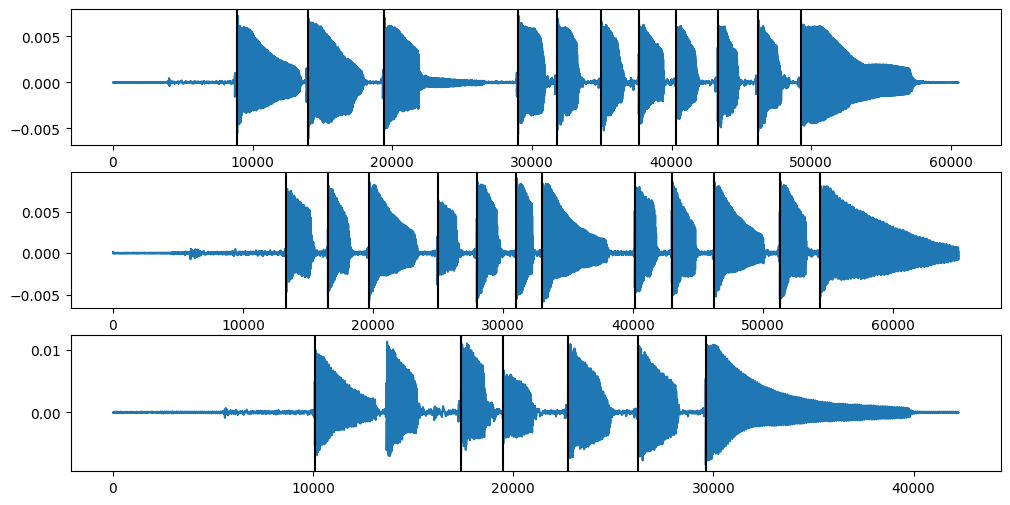

In [57]:
def find_notes(data, height=0.002, threshold=0.00001, min_distance=600):
    peaks = scipy.signal.find_peaks(data, height=height, threshold=threshold)[0]
    filtered_peaks = []

    q = 0
    for p in peaks:
        if len(filtered_peaks) == 0:
            filtered_peaks.append(p)
        else:
            if p - q > min_distance:
                filtered_peaks.append(p)
        q = p
    return np.array(filtered_peaks)

fig, ax = plt.subplots(3, figsize=(12,6))

ax[0].plot(riff1_resampled)
riff1_notes = find_notes(riff1_resampled)
for peak in riff1_notes:
    ax[0].axvline(peak, color='black')

ax[1].plot(riff2_resampled)
riff2_notes = find_notes(riff2_resampled)
for peak in riff2_notes:
    ax[1].axvline(peak, color='black')

ax[2].plot(riff3_resampled)
riff3_notes = find_notes(riff3_resampled)
for peak in riff3_notes:
    ax[2].axvline(peak, color='black')

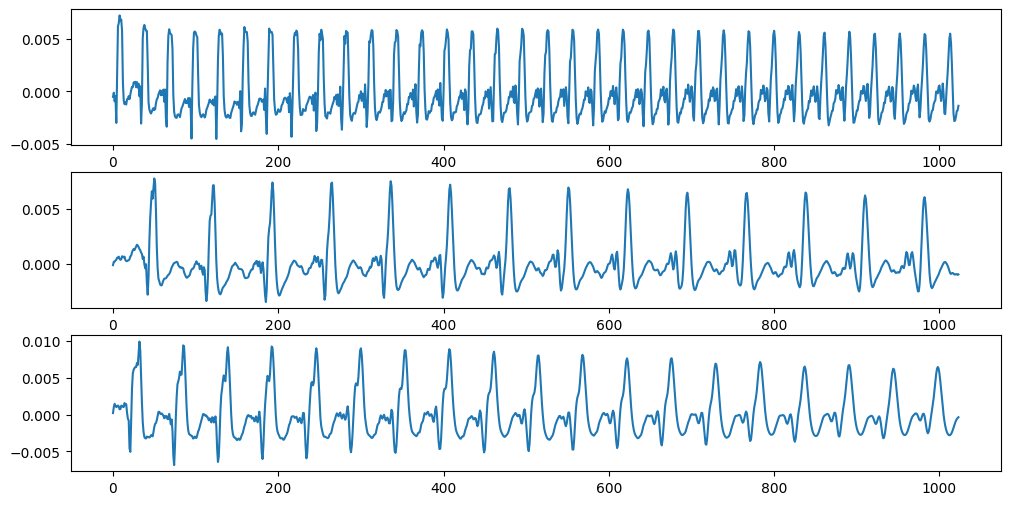

In [58]:
buffer_size = 1024
attack_shift = 20

riff1_notes_samples = np.array([riff1_resampled[p + attack_shift: p+attack_shift+buffer_size ] for p in riff1_notes])
riff2_notes_samples = np.array([riff2_resampled[p + attack_shift: p+attack_shift+buffer_size ] for p in riff2_notes])
riff3_notes_samples = np.array([riff3_resampled[p + attack_shift: p+attack_shift+buffer_size ] for p in riff3_notes])

fig, ax = plt.subplots(3, figsize=(12,6))

ax[0].plot(riff1_notes_samples[0])
ax[1].plot(riff2_notes_samples[0])
ax[2].plot(riff3_notes_samples[0])

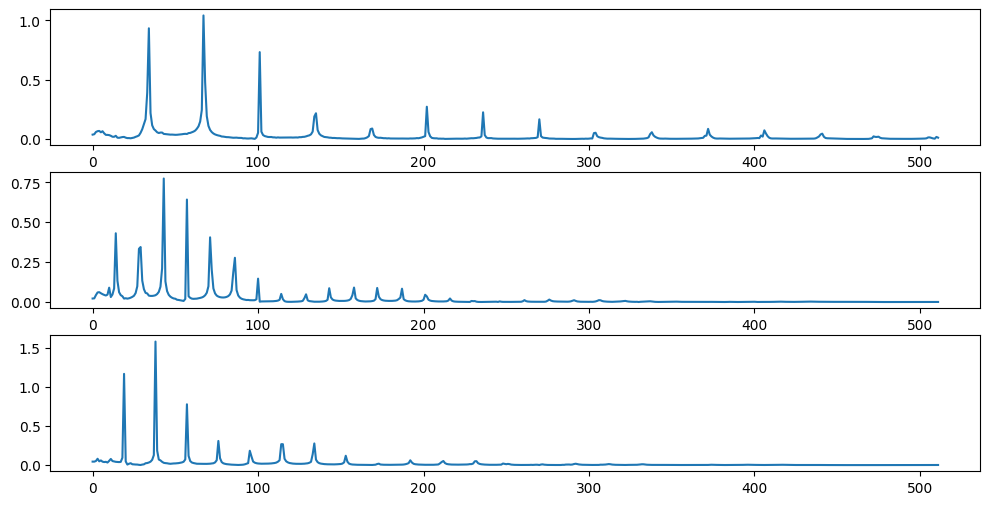

In [59]:
from scipy.fft import fft,ifft

zoom = 512

riff1_notes_fft = np.array([np.abs(fft(n))[0:zoom] for n in riff1_notes_samples])
riff2_notes_fft = np.array([np.abs(fft(n))[0:zoom] for n in riff2_notes_samples])
riff3_notes_fft = np.array([np.abs(fft(n))[0:zoom] for n in riff3_notes_samples])

fig, ax = plt.subplots(3, figsize=(12,6))

ax[0].plot(riff1_notes_fft[0])
ax[1].plot(riff2_notes_fft[0])
ax[2].plot(riff3_notes_fft[0])

In [61]:
def find_first_peak(f, height=0.20, threshold=0.01):
    return scipy.signal.find_peaks(f, height=height, threshold=threshold)[0][0]

riff1_notes_freq = np.array([find_first_peak(f) * new_rate / buffer_size for f in riff1_notes_fft])
riff2_notes_freq = np.array([find_first_peak(f) * new_rate / buffer_size for f in riff2_notes_fft])
riff3_notes_freq = np.array([find_first_peak(f) * new_rate / buffer_size for f in riff3_notes_fft])

print(riff1_notes_freq)
print(riff2_notes_freq)
print(riff3_notes_freq)

[199.21875  292.96875  234.375    222.65625  199.21875  234.375
 222.65625  199.21875  187.5      222.65625  146.484375]
[ 82.03125   99.609375 111.328125  82.03125   99.609375 117.1875
 111.328125  82.03125   99.609375 111.328125  99.609375  82.03125 ]
[111.328125 199.21875  164.0625   146.484375 134.765625 111.328125]


In [62]:
riff1_notes_ident = np.array([np.argmin(np.abs(freqs - freq)) for freq in riff1_notes_freq])
riff2_notes_ident = np.array([np.argmin(np.abs(freqs - freq)) for freq in riff2_notes_freq])
riff3_notes_ident = np.array([np.argmin(np.abs(freqs - freq)) for freq in riff3_notes_freq])

print(riff1_notes_ident)
print(riff2_notes_ident)
print(riff3_notes_ident)

[43 50 46 45 43 46 45 43 42 45 38]
[28 31 33 28 31 34 33 28 31 33 31 28]
[33 43 40 38 37 33]


In [63]:
import pretty_midi

def midify(notes_ident, notes_locations, duration=0.5):
    mf = pretty_midi.PrettyMIDI()
    
    piano_program = pretty_midi.instrument_name_to_program('Acoustic Grand Piano')
    piano = pretty_midi.Instrument(program=piano_program)
    
    for note_number, peak in zip(notes_ident,notes_locations):
        start = peak/new_rate
        note = pretty_midi.Note(velocity=100, pitch=note_number, start=start, end=start + duration)
        piano.notes.append(note)
    
    mf.instruments.append(piano)

    return mf

In [64]:
riff1_midi = midify(riff1_notes_ident, riff1_notes)
waveform = riff1_midi.fluidsynth(fs=rate)
IPython.display.Audio(waveform, rate=rate)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


In [65]:
riff2_midi = midify(riff2_notes_ident, riff2_notes)
waveform = riff2_midi.fluidsynth(fs=rate)
IPython.display.Audio(waveform, rate=rate)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


In [66]:
riff3_midi = midify(riff3_notes_ident, riff3_notes)
waveform = riff3_midi.fluidsynth(fs=rate)
IPython.display.Audio(waveform, rate=rate)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: error: Unknown integer parameter 'synth.sample-rate'
